In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import pandas as pd

def load_data(filepath: str):
    """Load screen time dataset from CSV file."""
    try:
        df = pd.read_csv(filepath, parse_dates=["date"])
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None


In [14]:


# ------------------------------
# 2. Analysis Functions
# ------------------------------
def daily_usage(df: pd.DataFrame):
    return df.groupby("date")["usage_minutes"].sum()

def app_usage(df: pd.DataFrame):
    return df.groupby("app_name")["usage_minutes"].sum().sort_values(ascending=False)

def top_apps(df: pd.DataFrame, n=5):
    return app_usage(df).head(n)

def average_usage(df: pd.DataFrame):
    return df.groupby("date")["usage_minutes"].sum().mean()

def most_opened_apps(df: pd.DataFrame, n=5):
    return df.groupby("app_name")["times_opened"].max().sort_values(ascending=False).head(n)

def avg_session_length(df: pd.DataFrame):
    return (df.groupby("app_name")["usage_minutes"].sum() /
            df.groupby("app_name")["times_opened"].max()).sort_values(ascending=False)

In [15]:
def plot_daily_usage(daily_usage):
    plt.figure(figsize=(10,5))
    sns.lineplot(x=daily_usage.index, y=daily_usage.values, marker="o")
    plt.title("📊 Daily Screen Time Usage")
    plt.xlabel("Date")
    plt.ylabel("Total Usage (minutes)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_app_usage(app_usage):
    plt.figure(figsize=(10,5))
    sns.barplot(x=app_usage.values, y=app_usage.index, palette="mako")
    plt.title("📱 Total Usage by App")
    plt.xlabel("Usage (minutes)")
    plt.ylabel("Applications")
    plt.tight_layout()
    plt.show()

def plot_app_opens(df):
    app_opens = df.groupby("app_name")["times_opened"].max().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=app_opens.values, y=app_opens.index, palette="viridis")
    plt.title("🔄 App Open Frequency")
    plt.xlabel("Times Opened")
    plt.ylabel("Applications")
    plt.tight_layout()
    plt.show()


📊 Daily Usage (minutes):
date
2024-01-01    2163
2024-01-02    2365
2024-01-03    2444
2024-01-04    1556
2024-01-05    2205
2024-01-06    1507
2024-01-07    1179
2024-01-08    1588
2024-01-09    1292
2024-01-10    1613
2024-01-11    1638
2024-01-12    1861
2024-01-13    1867
2024-01-14    1776
2024-01-15    1625
2024-01-16    2041
2024-01-17    2097
2024-01-18    1760
2024-01-19    1533
2024-01-20    1600
2024-01-21    2146
2024-01-22    1987
2024-01-23    1987
2024-01-24    2447
2024-01-25    2686
2024-01-26    2455
2024-01-27    1530
2024-01-28    2744
2024-01-29    1363
2024-01-30    1518
2024-01-31     958
2024-02-01    2173
2024-02-02    2646
2024-02-03    2033
2024-02-04    2673
2024-02-05    1957
2024-02-06    2390
2024-02-07    1221
2024-02-08    2293
2024-02-09    1523
2024-02-10    1673
2024-02-11    1773
2024-02-12     901
2024-02-13    2071
2024-02-14    2236
2024-02-15    1213
2024-02-16    2544
2024-02-17    1910
2024-02-18    2542
2024-02-19    1563
Name: usage_minutes,

/tmp/ipython-input-2769902442.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


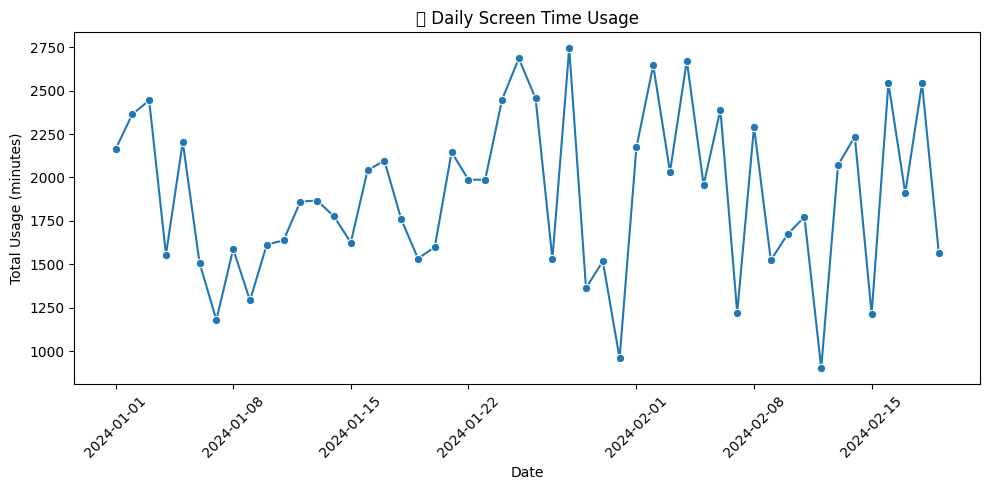

/tmp/ipython-input-2769902442.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_usage.values, y=app_usage.index, palette="mako")
/tmp/ipython-input-2769902442.py:17: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


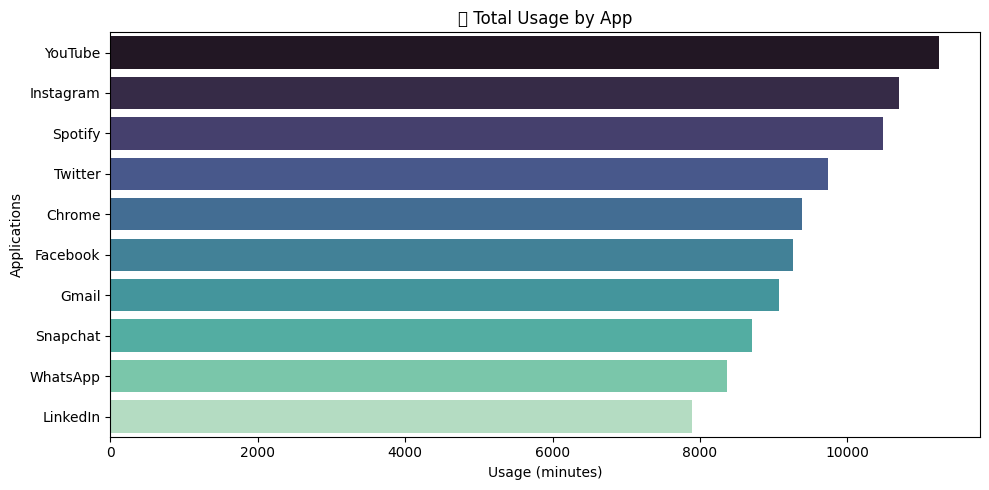

/tmp/ipython-input-2769902442.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_opens.values, y=app_opens.index, palette="viridis")
/tmp/ipython-input-2769902442.py:27: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


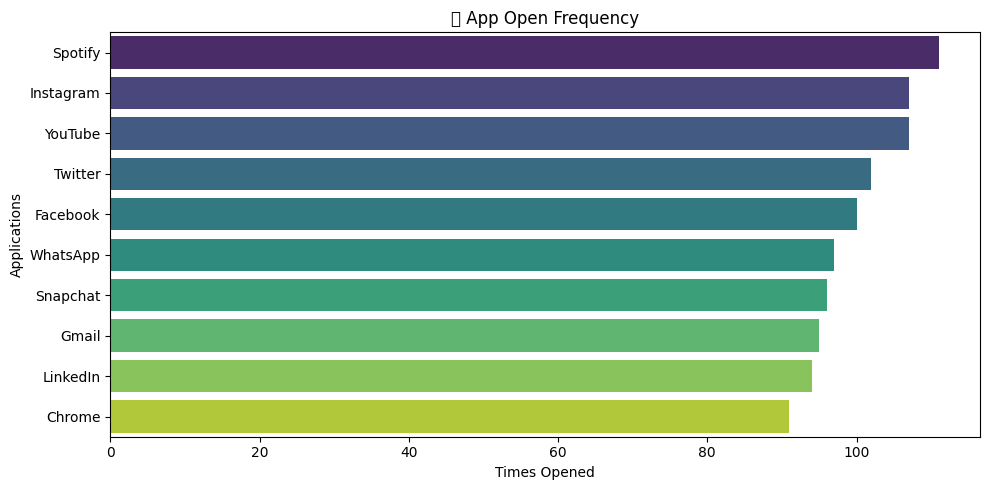

In [16]:
df = load_data("screen_time_dataset_with_opens.csv")  # 👈 make sure dataset is uploaded in notebook

if df is not None:
    print("📊 Daily Usage (minutes):")
    print(daily_usage(df), "\n")

    print("📱 Total Usage by App:")
    print(app_usage(df), "\n")

    print("🔥 Top 5 Apps by Usage:")
    print(top_apps(df), "\n")

    print(f"⏱️ Average Daily Screen Time: {average_usage(df):.2f} minutes\n")

    print("🔄 Most Frequently Opened Apps:")
    print(most_opened_apps(df), "\n")

    print("📉 Average Session Length per App (minutes per open):")
    print(avg_session_length(df), "\n")

    # Visualizations
    plot_daily_usage(daily_usage(df))
    plot_app_usage(app_usage(df))
    plot_app_opens(df)